In [1]:
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [3]:
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Exploratory Analysis
From these charts it looks like we have no missing values!

It seems as though Serial No. is just an index for students, which we can take out.

Two columns also have an added space in the label which we'll take out

We are also removing the blank sapces.

In [7]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

Let's plot a heatmap to see the correlation of all the features compared to Chance to Admit:

<Axes: >

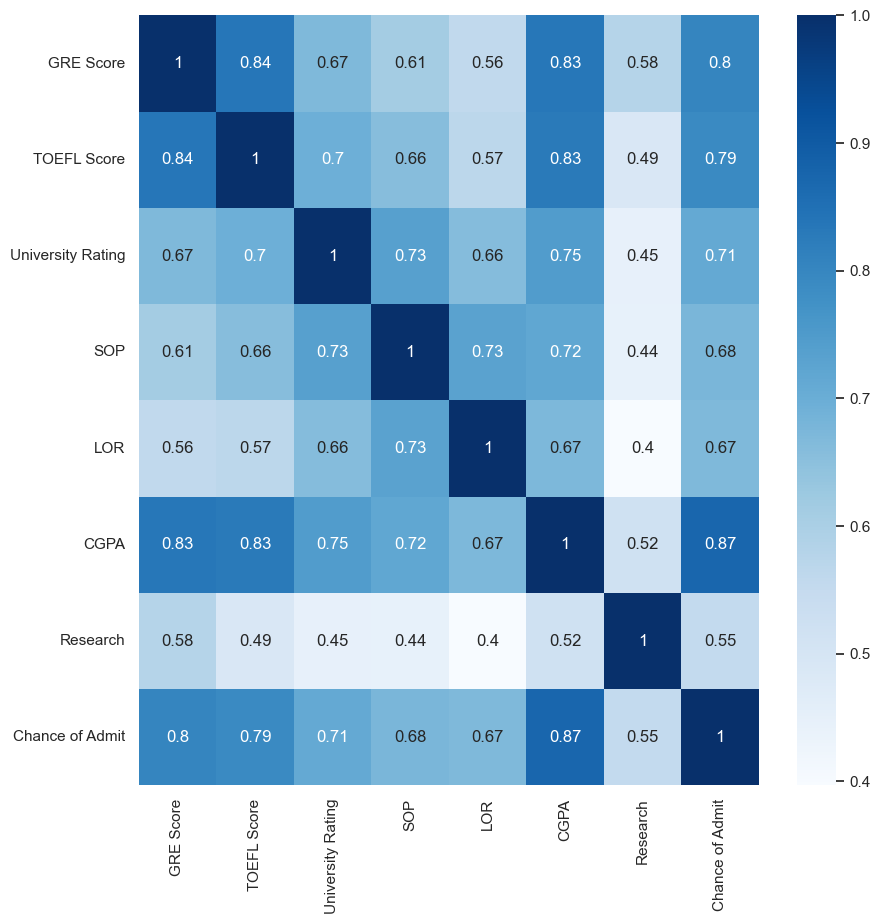

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')


The top three features that affect the Chance to Admit are:

CGPA
GRE Score
TOEFL Score
Let's explore these three features to get a better understanding.

CGPA
The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

CGPA vs Chance of Admit
It appears as applicant's CGPA has a strong correlation with their chance of admission.



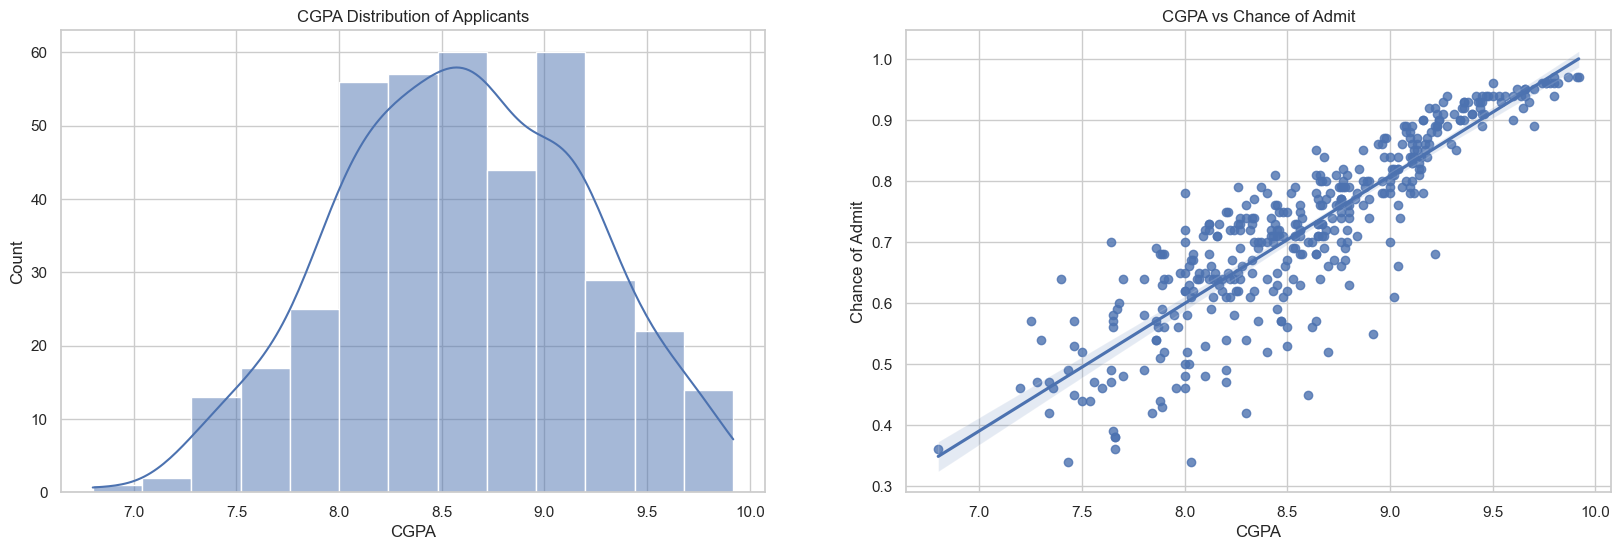

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Subplot 1: CGPA Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], kde=True)  # Use histplot instead of distplot
plt.title('CGPA Distribution of Applicants')

# Subplot 2: CGPA vs Chance of Admit
plt.subplot(1, 2, 2)
sns.regplot(x='CGPA', y='Chance of Admit', data=df)
plt.title('CGPA vs Chance of Admit')

plt.show()


GRE Score
The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

Analytical Writing (Scored on a 0-6 scale in half-point increments)
Verbal Reasoning (Scored on a 130-170 scale)
Quantitative Reasoning (Scored on a 130-170 scale)
In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

GRE Score vs Chance of Admit
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

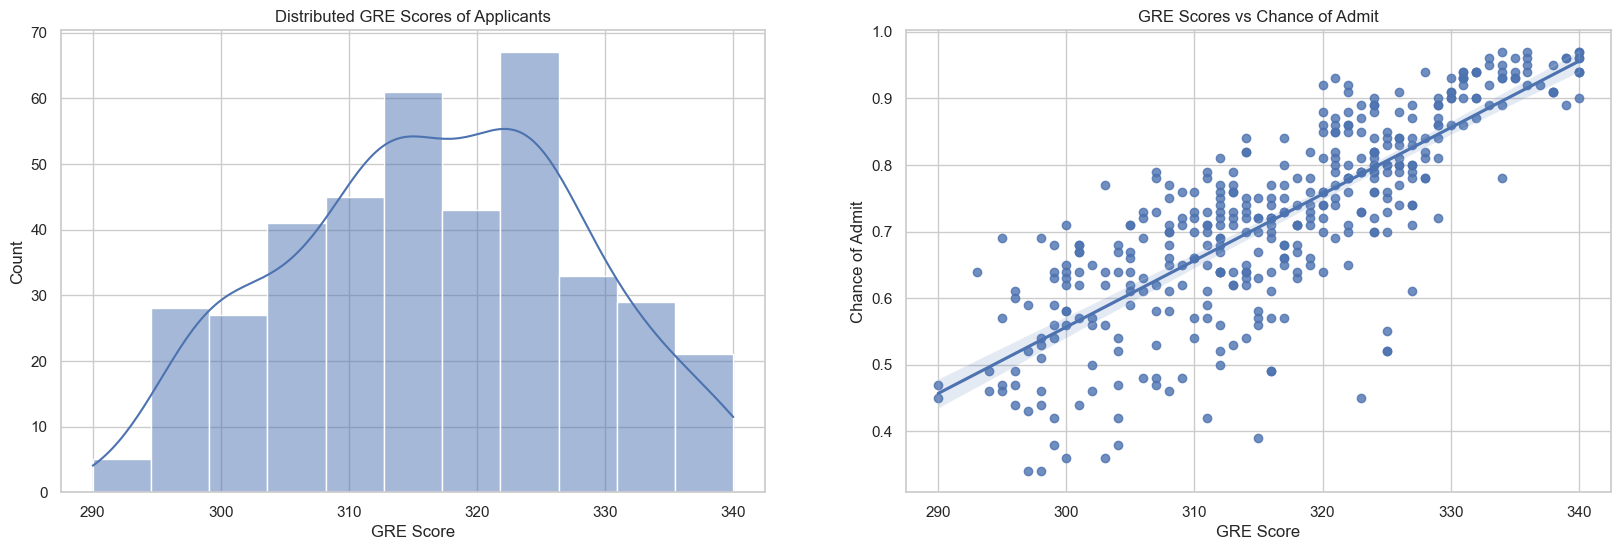

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Subplot 1: Distribution of GRE Scores
plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'], kde=True)  # Use histplot instead of distplot
plt.title('Distributed GRE Scores of Applicants')

# Subplot 2: GRE Scores vs Chance of Admit
plt.subplot(1, 2, 2)
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)  # Specify x and y variables
plt.title('GRE Scores vs Chance of Admit')

plt.show()


TOEFL Score
The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

Reading
Listening
Speaking
Writing
All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

TOEFL Score vs Chance of Admit
Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.



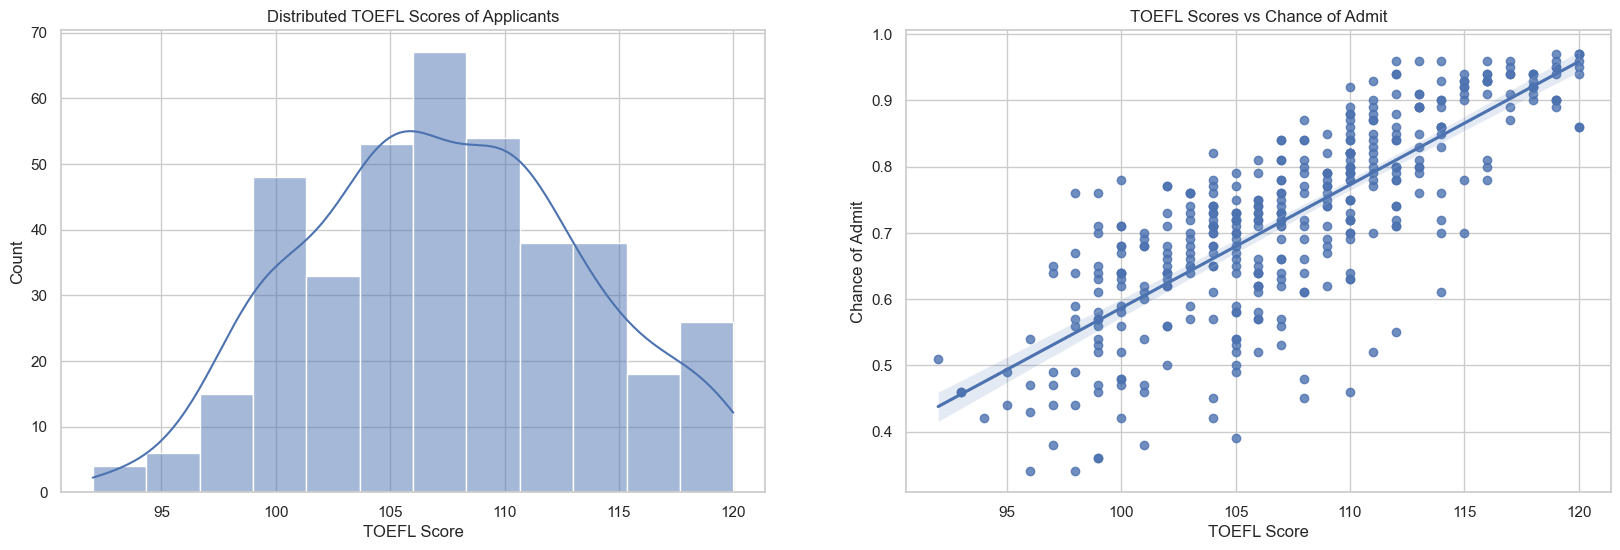

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Subplot 1: Distribution of TOEFL Scores
plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'], kde=True)  # Use histplot instead of distplot
plt.title('Distributed TOEFL Scores of Applicants')

# Subplot 2: TOEFL Scores vs Chance of Admit
plt.subplot(1, 2, 2)
sns.regplot(x='TOEFL Score', y='Chance of Admit', data=df)
plt.title('TOEFL Scores vs Chance of Admit')

plt.show()


Let's explore how many applicants have research experience.

It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

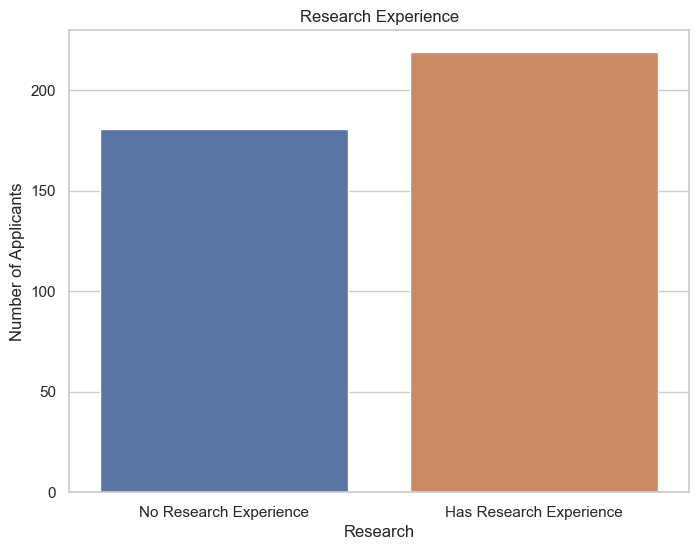

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Research', data=df, order=[0, 1])  # Specify order of x-axis ticks
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

plt.show()


Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

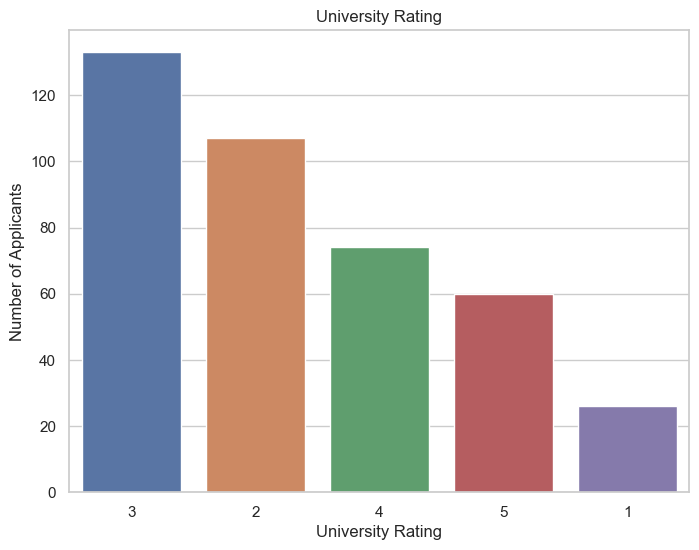

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='University Rating', data=df, order=df['University Rating'].value_counts().index)
plt.title('University Rating')
plt.ylabel('Number of Applicants')

plt.show()


lets prepare data for machine learning

In [19]:
targets = df['Chance of Admit']  # Target variable (dependent variable)
features = df.drop(columns={'Chance of Admit'})  # Features (independent variables)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the testing set using the same scaler
X_test = scaler.transform(X_test)


Machine Learning 
Now we'll implement machine learning algorithms to predict the chance of admission. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

Logistic Regression
Support vector machine
Random Forests

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable
threshold = 0.5
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train_binary)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the performance
accuracy_logistic = accuracy_score(y_test_binary, logistic_predictions)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(classification_report(y_test_binary, logistic_predictions))


Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.95      1.00      0.97        70

    accuracy                           0.95        80
   macro avg       0.97      0.80      0.86        80
weighted avg       0.95      0.95      0.94        80



In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train_binary)  # Use the binary target variable

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test_binary, svm_predictions)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test_binary, svm_predictions))


SVM Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Continue with SVM model training and evaluation using X_train_scaled and X_test_scaled


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train_binary)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test_binary, svm_predictions)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test_binary, svm_predictions))


SVM Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a random forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train_binary)  # Use the binary target variable

# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test_binary, random_forest_predictions)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test_binary, random_forest_predictions))


Random Forest Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.90      1.00      0.95        70

    accuracy                           0.90        80
   macro avg       0.95      0.60      0.64        80
weighted avg       0.91      0.90      0.87        80



Comparing Scores
Let's put all the scores in a table and display their scores side-by-side.

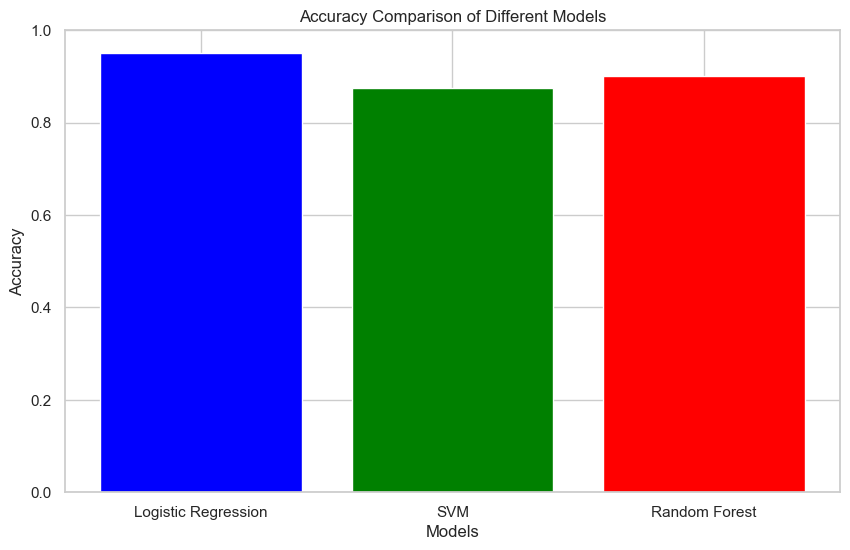

In [28]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_logistic, accuracy_svm, accuracy_rf]
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to ensure accurate representation
plt.show()


In [29]:
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'SVM Accuracy: {accuracy_svm}')
print(f'Random Forest Accuracy: {accuracy_rf}')


Logistic Regression Accuracy: 0.95
SVM Accuracy: 0.875
Random Forest Accuracy: 0.9


selecting best alogorithm
Logistic Regression Accuracy: 0.95
SVM Accuracy: 0.875
Random Forest Accuracy: 0.9 it seems logistic regression model works well with the data

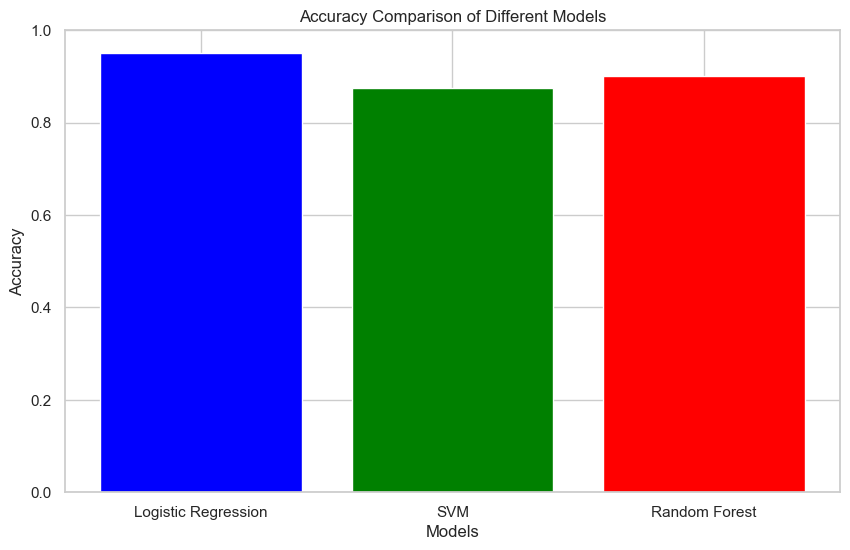

In [32]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train_binary)

# Make predictions on the test set
logistic_predictions_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Threshold adjustment
thresholds = np.arange(0, 1.05, 0.05)
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    logistic_predictions = (logistic_predictions_prob > threshold).astype(int)

    # Evaluate the performance
    precision = precision_score(y_test_binary, logistic_predictions)
    recall = recall_score(y_test_binary, logistic_predictions)
    accuracy = accuracy_score(y_test_binary, logistic_predictions)

    print(f'Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | Accuracy: {accuracy:.2f}')


Threshold: 0.00 | Precision: 0.88 | Recall: 1.00 | Accuracy: 0.88
Threshold: 0.05 | Precision: 0.88 | Recall: 1.00 | Accuracy: 0.88
Threshold: 0.10 | Precision: 0.88 | Recall: 1.00 | Accuracy: 0.88
Threshold: 0.15 | Precision: 0.89 | Recall: 1.00 | Accuracy: 0.89
Threshold: 0.20 | Precision: 0.90 | Recall: 1.00 | Accuracy: 0.90
Threshold: 0.25 | Precision: 0.90 | Recall: 1.00 | Accuracy: 0.90
Threshold: 0.30 | Precision: 0.91 | Recall: 1.00 | Accuracy: 0.91
Threshold: 0.35 | Precision: 0.92 | Recall: 1.00 | Accuracy: 0.93
Threshold: 0.40 | Precision: 0.92 | Recall: 1.00 | Accuracy: 0.93
Threshold: 0.45 | Precision: 0.92 | Recall: 1.00 | Accuracy: 0.93
Threshold: 0.50 | Precision: 0.95 | Recall: 1.00 | Accuracy: 0.95
Threshold: 0.55 | Precision: 0.95 | Recall: 0.99 | Accuracy: 0.94
Threshold: 0.60 | Precision: 0.95 | Recall: 0.99 | Accuracy: 0.94
Threshold: 0.65 | Precision: 0.96 | Recall: 0.99 | Accuracy: 0.95
Threshold: 0.70 | Precision: 0.96 | Recall: 0.97 | Accuracy: 0.94
Threshold:

C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
